# Slicing seismic arrays

This is a short tutorial on how to load a matrix of numbers from a textfile into a 2-dimensional array, and then reshape that array into 3-dimensional array and make some annotated plots along each of the dimensions of a seismic volume.

This notebook is associated with the blog post, [Slicing seismic arrays](http://www.agilegeoscience.com/journal/2014/6/16/slicing-seismic-arrays.html).

First we load the <code>NumPy</code> package for number crunching and array manipulation. Load the <code>pyplot</code> module from <code>matplotlib</code> for plotting. It is conventional to give these packages the nicknames <code>np</code> and <code>plt</code> respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The seismic data in this example has been made ultra-simple for illustration purposes. It a simple text file comprised of columns of numbers, with no header information at the start of the file. We can load this text file into our workspace by using the numpy <code>loadtxt</code> command. 

In [2]:
data = np.loadtxt('data/slicing_seismic.txt')

The <code>np.loadtxt</code> function returns an array. Arrays have an intrinsic attribute called <code>shape</code> that we can call to inspect the size of the array,

In [3]:
print(data.shape)

(10000, 500)


<code>data.shape()</code> returns a tuple of the number of elements within each dimension of the array. This says that <code>data</code> is a 2-dimensional array, with 100000 elements along the first dimension (traces), and 500 elements along the second dimensions (samples per trace).

Since <code>data.shape()</code> returns a tuple, we can assign two new variables for describing the size of each of the dimensions in this textfile. The size of the first dimension is equal to the number of inlines, <code>nIL</code> multiplied by the the number of crosslines, <code>nXL</code>,

In [4]:
nILnXL, nt = data.shape

In our case, and by the way I've designed this example, the number of inlines equals the number of crosslines (100). 

In [10]:
nIL = int(np.sqrt(nILnXL))
nXL = int(np.sqrt(nILnXL))

print(nIL, nXL)

100 100


Now use the the variables, <code>nIL</code>, <code>nXL</code>, and <code>nt</code> to <code>np.reshape()</code> our 2D array into its proper 3D shape:

In [11]:
new_data = np.reshape(data, (nIL, nXL, nt))
print(new_data.shape)

(100, 100, 500)


Index into the time slice (0 to 499), an inline (0 to 99), and a crossline (0 to 99)

In [12]:
z = 122
inline = 30
xline = 60

Create a figure with three panels: timeslice, inline and crossline

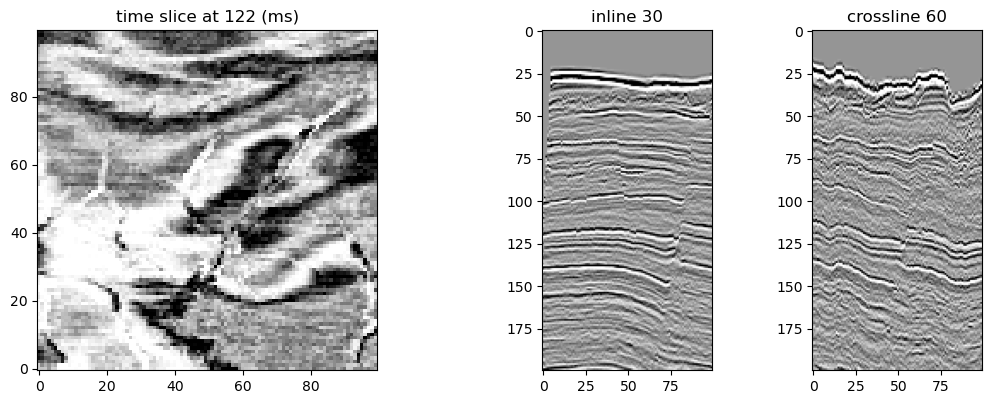

In [13]:
f = plt.figure(figsize=(12,4), facecolor='white')

# Plot timeslice
ax = f.add_axes([0.1, 0.05, 0.35, 0.85])
ax.imshow(np.transpose(new_data[:,::-1,z]), 
            cmap = 'Greys', 
            vmin = -4000, vmax = 4000,
            origin='lower')
ax.set_title('time slice at %d (ms)' % z, fontsize = 12)    

# Plot inline
ax2 = f.add_axes([0.525, 0.05, 0.2, 0.85])
ax2.imshow(np.transpose(new_data[:,inline,:200]), 
            cmap = 'Greys', 
            vmin = -4000, vmax = 4000,
            origin='upper')
ax2.set_title('inline %d' % inline, fontsize = 12)
    
# Plot xline 
ax3 = f.add_axes([0.75, 0.05, 0.2, 0.85])
ax3.imshow(np.transpose(new_data[xline,:,:200]), 
                cmap = 'Greys', 
                vmin = -4000, vmax = 4000,
                origin='upper')
ax3.set_title('crossline %d' % xline, fontsize = 12)

plt.show()

Let's add some code to make a number of plotting annotations and decorations. Admittedly it is a rather verbose.

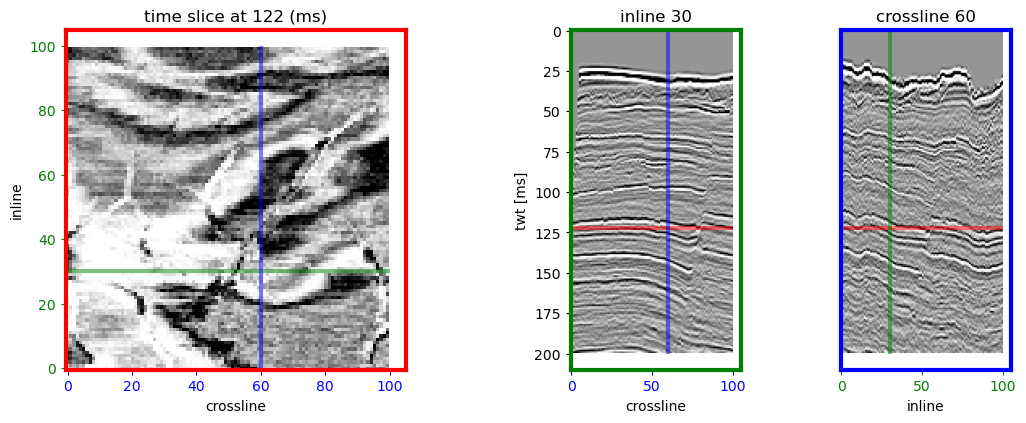

In [31]:
f = plt.figure(figsize=(12,4), facecolor='white')

ax = f.add_axes([0.1, 0.05, 0.35, 0.85])
ax.imshow(np.transpose(new_data[:,::-1,z]), 
            cmap = 'Greys', 
            vmin = -4000, vmax = 4000,
            origin='lower')
ax.set_title('time slice at %d (ms)' % z, fontsize = 12)    

# Plot inline
ax2 = f.add_axes([0.525, 0.05, 0.2, 0.85])
ax2.imshow(np.transpose(new_data[:,inline,:200]), 
            cmap = 'Greys', 
            vmin = -4000, vmax = 4000,
            origin='upper')
ax2.set_title('inline %d' % inline, fontsize = 12)
    
# Plot xline 
ax3 = f.add_axes([0.75, 0.05, 0.2, 0.85])
ax3.imshow(np.transpose(new_data[xline,:,:200]), 
                cmap = 'Greys', 
                vmin = -4000, vmax = 4000,
                origin='upper')
ax3.set_title('crossline %d' % xline, fontsize = 12)

ax3.hlines(z, 0,100, 'r', lw=3, alpha = 0.5)
ax2.hlines(z, 0,100, 'r', lw=3, alpha = 0.5)
ax.hlines(inline, 0,100,'g', lw=3, alpha = 0.5)
ax.vlines(xline, 0,100, 'b', lw=3, alpha = 0.5)
ax2.vlines(xline,0,200,'b', lw=3, alpha = 0.5)
ax3.vlines(inline,0,200,'g', lw=3, alpha = 0.5)
    
# # Color and line weight of time slice
ax.spines['bottom'].set_color('red')
ax.spines['bottom'].set(lw=3)
ax.spines['top'].set_color('red') 
ax.spines['top'].set(lw=3)
ax.spines['right'].set_color('red')
ax.spines['right'].set(lw=3)
ax.spines['left'].set_color('red')
ax.spines['left'].set(lw=3)
    
# Color and line weight of inline
ax2.spines['bottom'].set_color('green')
ax2.spines['bottom'].set(lw=3)
ax2.spines['top'].set_color('green') 
ax2.spines['top'].set(lw=3)
ax2.spines['right'].set_color('green')
ax2.spines['right'].set(lw=3)
ax2.spines['left'].set_color('green')
ax2.spines['left'].set(lw=3)
    
# Color and line weight of xline
ax3.spines['bottom'].set_color('blue')
ax3.spines['bottom'].set(lw=3)
ax3.spines['top'].set_color('blue') 
ax3.spines['top'].set(lw=3)
ax3.spines['right'].set_color('blue')
ax3.spines['right'].set(lw=3)
ax3.spines['left'].set_color('blue')
ax3.spines['left'].set(lw=3)
    
# Set the colors on the axis labels to match
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')
ax2.tick_params(axis='x', colors='blue')
ax3.tick_params(axis='x', colors='green')
ax.set_ylabel('inline', fontsize=10)
ax.set_xlabel('crossline', fontsize=10)
ax2.set_ylabel('twt [ms]', fontsize=10)
ax2.set_xlabel('crossline', fontsize=10)
ax3.set_ylabel('twt [ms]', fontsize=10)
ax3.set_xlabel('inline', fontsize=10)
ax3.axes.get_yaxis().set_visible(False)

plt.show()